In [1]:
#Dataloaders for the 4DeNoise project

In [4]:
#Importing libraries
import hyperspy.api as hs
import torch
import matplotlib.pyplot as plt
#%matplotlib widget

c:\Users\m03855jw\AppData\Local\hyperspy-bundle\Lib\site-packages\hyperspy\io.py:651: VisibleDeprecationWarning: Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
  warnings.warn(


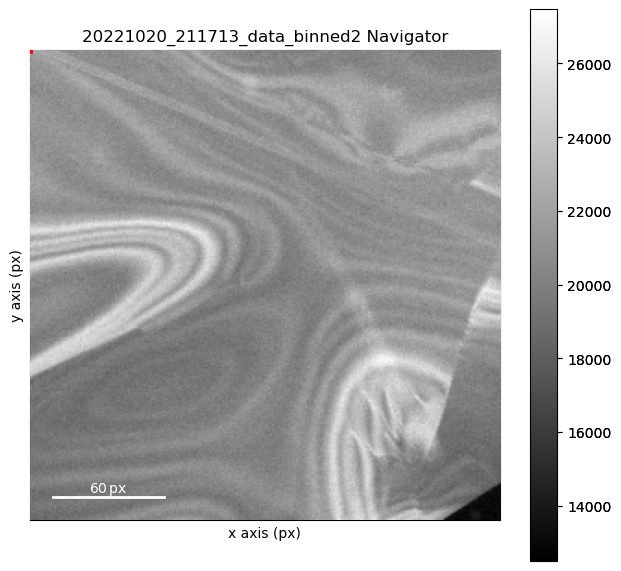

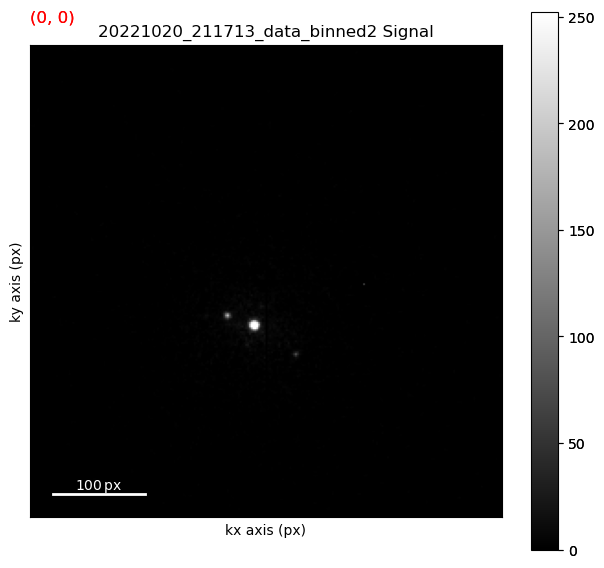

In [12]:
#Loading 4D STEM data
file_path=r"C:\Users\m03855jw\Downloads\4D-STEM_data_for_anthracene\4D-STEM_data_for_anthracene\Mg31872\20221020_211713_data_binned2.hdf5"
s1=hs.load(file_path, reader="hspy")
s1.plot()

In [4]:
s1.data.shape

(255, 255, 257, 257)

In [ ]:
s1.data

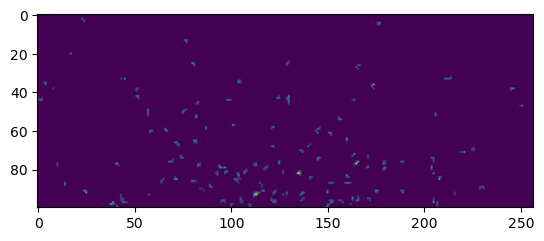

In [6]:
plt.imshow(s1.data[0,0,:100,:])
plt.show()

In [21]:
#Settings for inference area (e.g. 2 before, 2 after)
inference_H=1
inference_W=5

In [17]:
#Custom dataset object
class DataSet(torch.utils.data.Dataset):
    def __init__(self, file_paths):
        #file_paths here is a list of paths refers to a list of paths to files that are used as sources of data
        self.imgs=[]
        for file_path in file_paths:
            self.imgs.append(hs.load(file_path, reader="hspy"))

    #Height and width
    def img_H(self,img_index):
        return self.imgs[img_index].data.shape[2]

    def img_W(self,img_index):
        return self.imgs[img_index].data.shape[3]

    def index_location(self, index): #FInds a location in i, x, y (i being the img_index) of pixel number index
        if index>self.__len__():
            raise ValueError("Index too high")

        running_total=0
        for img_index in range(len(self.imgs)):
            new_running_total=running_total+((self.img_H(img_index)+1-inference_H)*(self.img_W(img_index)+1-inference_W))
            if index<new_running_total: #It's in this image
                difference=index-running_total
                x_pos=difference%self.img_W(img_index)
                y_pos=difference//self.img_W(img_index)
                return img_index, x_pos, y_pos
            else:
                running_total=new_running_total

    def __len__(self):
        running_total=0
        for img_index in range(len(self.imgs)):
            running_total+=(self.img_H(img_index)+1-inference_H)*(self.img_W(img_index)+1-inference_W)
        return running_total
    
    """
    def __getitem__(self, index):


        item_input=
        item_output=
        
        return factors, product
    """

In [ ]:
testing_dataset=DataSet([r"C:\Users\m03855jw\Downloads\4D-STEM_data_for_anthracene\4D-STEM_data_for_anthracene\Mg31872\20221020_211713_data_binned2.hdf5"])

c:\Users\m03855jw\AppData\Local\hyperspy-bundle\Lib\site-packages\hyperspy\io.py:651: VisibleDeprecationWarning: Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
  warnings.warn(


In [29]:
testing_dataset.index_location(65022)

(1, 1, 0)

65021